In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
data.shape

(303, 14)

In [41]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [42]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

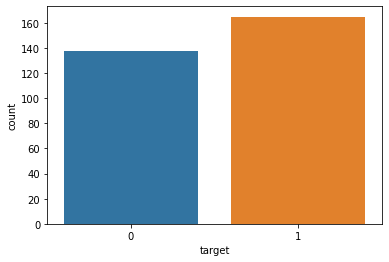

In [43]:
import seaborn as sns
sns.countplot("target", data = data)

In [44]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique())<=9:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [45]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [46]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

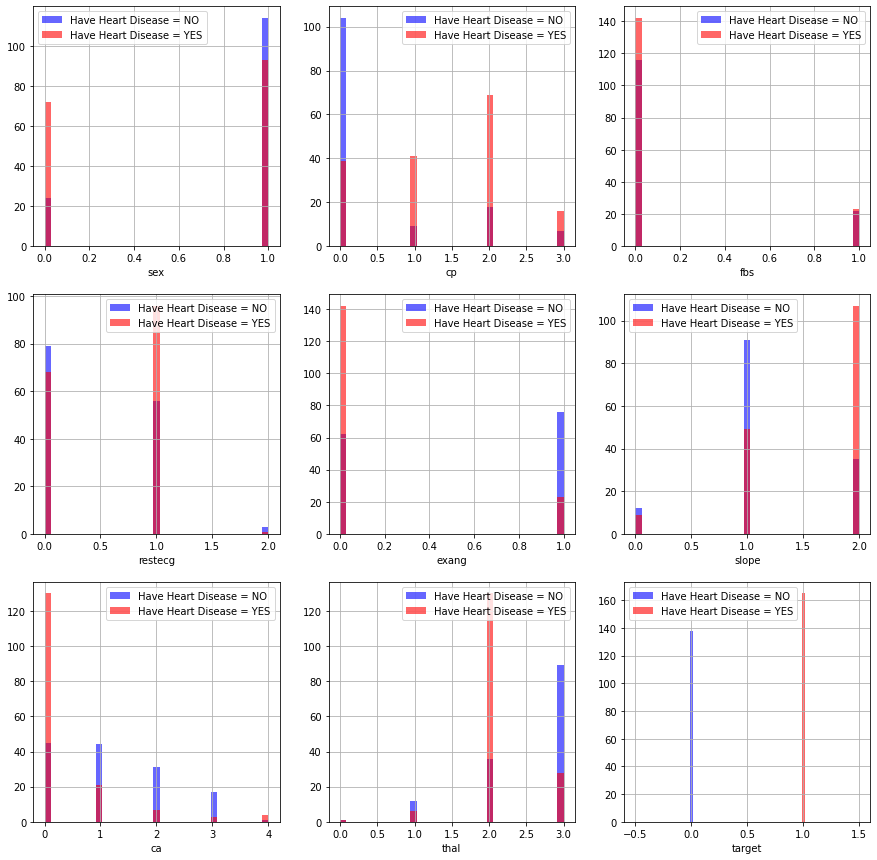

In [47]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

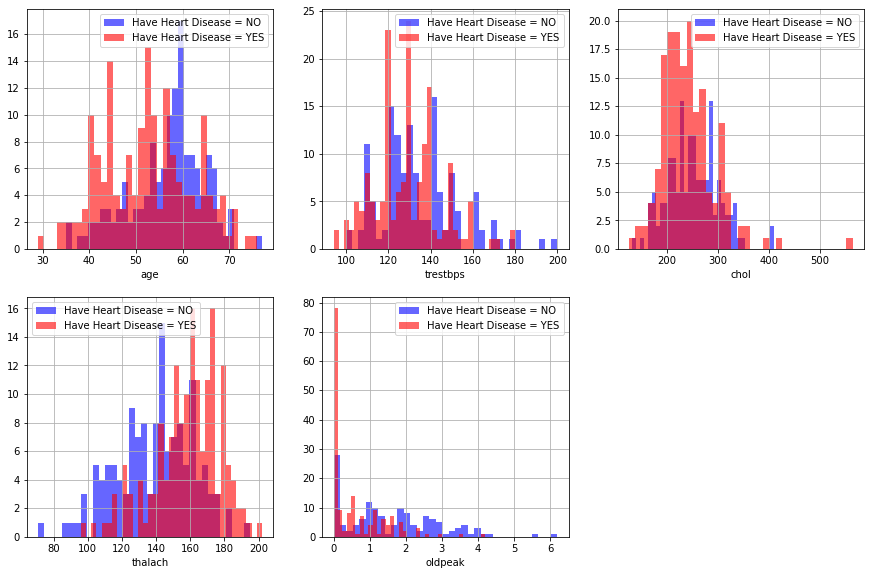

In [48]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [49]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [50]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [51]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [52]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [53]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred1=lr_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred1))

Accuracy:  0.8571428571428571


In [62]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,26) #1-25
scores = {} 
scores_list = [] 
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)  #model building
        knn.fit(X_train,y_train) #training
        y_pred2=knn.predict(X_test) #testing
        scores[k] = metrics.accuracy_score(y_test,y_pred2)
        scores_list.append(metrics.accuracy_score(y_test,y_pred2))

In [63]:
scores

{1: 0.7472527472527473,
 2: 0.7142857142857143,
 3: 0.8351648351648352,
 4: 0.7802197802197802,
 5: 0.8681318681318682,
 6: 0.8241758241758241,
 7: 0.8571428571428571,
 8: 0.8571428571428571,
 9: 0.8461538461538461,
 10: 0.8571428571428571,
 11: 0.8461538461538461,
 12: 0.8571428571428571,
 13: 0.8571428571428571,
 14: 0.8461538461538461,
 15: 0.8571428571428571,
 16: 0.8461538461538461,
 17: 0.8791208791208791,
 18: 0.8571428571428571,
 19: 0.8901098901098901,
 20: 0.8681318681318682,
 21: 0.8791208791208791,
 22: 0.8571428571428571,
 23: 0.8791208791208791,
 24: 0.8571428571428571,
 25: 0.8681318681318682}

In [64]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)  #model is trained
y_pred2=lr_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.8571428571428571


In [69]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=1.0,gamma=0.01)
clf.fit(X_train,y_train)
y_pred3=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred3))

Accuracy:  0.8791208791208791


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)
y_pred4=rf_clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred4))

Accuracy:  0.8351648351648352


In [78]:
results_df = pd.DataFrame(data=[["Logistic Regression", metrics.accuracy_score(y_test, y_pred1)]], columns=['Model', 'Accuracy'])
results_df

,Model,Accuracy
0,Logistic Regression,0.857143


In [79]:
results_df_2 = pd.DataFrame(data=[["K-nearest neighbors",metrics.accuracy_score(y_test, y_pred2)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.857143


In [80]:
results_df_2 = pd.DataFrame(data=[["SVM",metrics.accuracy_score(y_test, y_pred3)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.857143
2,SVM,0.879121


In [82]:
results_df_2 = pd.DataFrame(data=[["Random Forest",metrics.accuracy_score(y_test, y_pred4)]], 
                          columns=['Model','Accuracy'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy
0,Logistic Regression,0.857143
1,K-nearest neighbors,0.857143
2,SVM,0.879121
3,Random FOrest,0.835165
4,Random Forest,0.835165
